In [20]:
import xlrd
import random
import string
import names
import numpy as np
import bcrypt
import matplotlib.pyplot as plt
import pandas as pd
from numpy import corrcoef

In [12]:
def test(a,b,user_ip, avg_ip, num_user_skills, num_group_skills):
    # a: weight of ip_ratio(0-100), b: weight of skills_ratio(0-100)
    skill_ratio = (num_user_skills / num_group_skills) * 100
    ip_ratio = max(500 - abs(user_ip - avg_ip), 0) * 0.2 
    result = ip_ratio * a + b * skill_ratio
    return result

ip_ratio = 0.1 skill_ratio = 0.9
ip_ratio = 0.2 skill_ratio = 0.8
ip_ratio = 0.3 skill_ratio = 0.7
ip_ratio = 0.4 skill_ratio = 0.6
ip_ratio = 0.5 skill_ratio = 0.5
ip_ratio = 0.6 skill_ratio = 0.4
ip_ratio = 0.7 skill_ratio = 0.3
ip_ratio = 0.8 skill_ratio = 0.2
ip_ratio = 0.9 skill_ratio = 0.1
[0, 0, 0, 395, 1495, 1395, 451, 3726, 445]


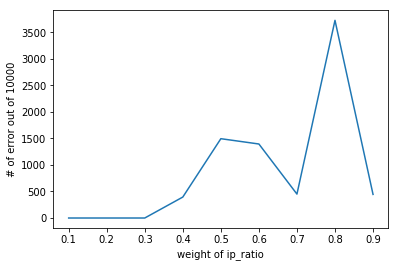

In [156]:
# assume the avg_skill that a group need is 5
ratio_error = []
for a in range(1, 10):
    data = {'ip_ratio':[],
            'user_ip':[],
            'group_avg':[],
            'user_skill':[],
            'result':[]
                }
    for i in range(10000):
        user_ip = random.randrange(600,1000)
        avg_ip = random.randrange(600,1000)
        user_skills = random.randrange(6)
        group_skills = 5
        result_list = []

        result = (test(a * 0.1, 1 - a * 0.1, user_ip,avg_ip, user_skills, group_skills))   
        data['user_ip'].append(user_ip)
        data['group_avg'].append(avg_ip)
        data['ip_ratio'].append(a * 0.1)
        data['user_skill'].append(user_skills)
        data['result'].append(result)
    df = pd.DataFrame(data)
    
    print("ip_ratio = " + str(a / 10) + " skill_ratio = {0:.1f}".format(1 - a * 0.1))
    #display(df.sort_values(by=['result'], ascending=False).style.hide_index())
    
    diff = [abs(a - b) for (a,b) in zip(data['user_ip'],data['group_avg'])]
    skill_vs_result = [[a,b] for (a,b) in zip(data['user_skill'], data['result'])]
    sort_list = sorted(skill_vs_result, key=lambda x : x[1])[::-1]
    prev = 5
    count = 0
    for [a,b] in sort_list:
        if (abs(a - prev) >= 2):
            count += 1
        prev = a
    ratio_error.append(count)
print(ratio_error)
plt.xlabel("weight of ip_ratio")
plt.ylabel("# of error out of 10000")
plt.plot([i * 0.1 for i in range(1,10)],ratio_error)